In [1]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
%time df = pd.read_csv(r"D:\Nhan\Data\XTX_data.csv")
print(df.shape)
df.head(10)

Wall time: 20.9 s
(2999999, 61)


,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
5,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
6,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
7,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
8,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
9,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5


In [3]:
%time df = df.fillna(0)
df.head()

Wall time: 1.11 s


,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5


In [4]:
y = df.iloc[:, -1].cumsum()

def train_test_split(df, p_train = 0.667):
    N = len(df)
    y = df.y.cumsum()
    train_size = int(p_train*N)
    X_train = df.iloc[: train_size, :-1]
    y_train = y[: train_size]
    X_test = df.iloc[train_size :, :-1]
    y_test = y[train_size :]
    
    return X_train, y_train, X_test, y_test

%time X_train, y_train, X_test, y_test = train_test_split(df, 0.7)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

Wall time: 47.9 ms


((2099999, 60), (900000, 60), (2099999,), (900000,))

In [5]:
print(y_train[:10].values)
X_train.head()

[-0.5 -1.  -1.5 -2.  -2.5 -3.  -3.5 -4.  -4.5 -5. ]


,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14
0,1619.5,1620.0,1621.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0
1,1619.5,1620.0,1621.0,1621.5,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0
2,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0
3,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0
4,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0


### XGBoost model without using `scaling data`

In [6]:
reg = xgb.XGBRegressor(n_estimators = 10000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds = 50,
        verbose = 2)

[0]	validation_0-rmse:2275.66699	validation_1-rmse:3340.00684
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[2]	validation_0-rmse:1125.37756	validation_1-rmse:1732.17798
[4]	validation_0-rmse:569.35468	validation_1-rmse:947.19104
[6]	validation_0-rmse:308.84671	validation_1-rmse:568.90625
[8]	validation_0-rmse:197.56244	validation_1-rmse:389.90729
[10]	validation_0-rmse:156.35960	validation_1-rmse:310.79242
[12]	validation_0-rmse:142.03740	validation_1-rmse:277.51315
[14]	validation_0-rmse:134.19113	validation_1-rmse:261.94898
[16]	validation_0-rmse:130.04761	validation_1-rmse:255.69847
[18]	validation_0-rmse:126.97958	validation_1-rmse:252.78227
[20]	validation_0-rmse:124.67215	validation_1-rmse:250.89746
[22]	validation_0-rmse:122.85513	validation_1-rmse:250.87627
[24]	validation_0-rmse:120.98587	validation_1-rmse:251.04146
[26]	validation_0-rmse:118.26141	validation_1-rms

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### `Feature Importances`
**`Feature importance`** is a great way to get a general idea about which features the model is relying on most to make the prediction. 

This is a metric that simply sums up how many times each feature is split on.

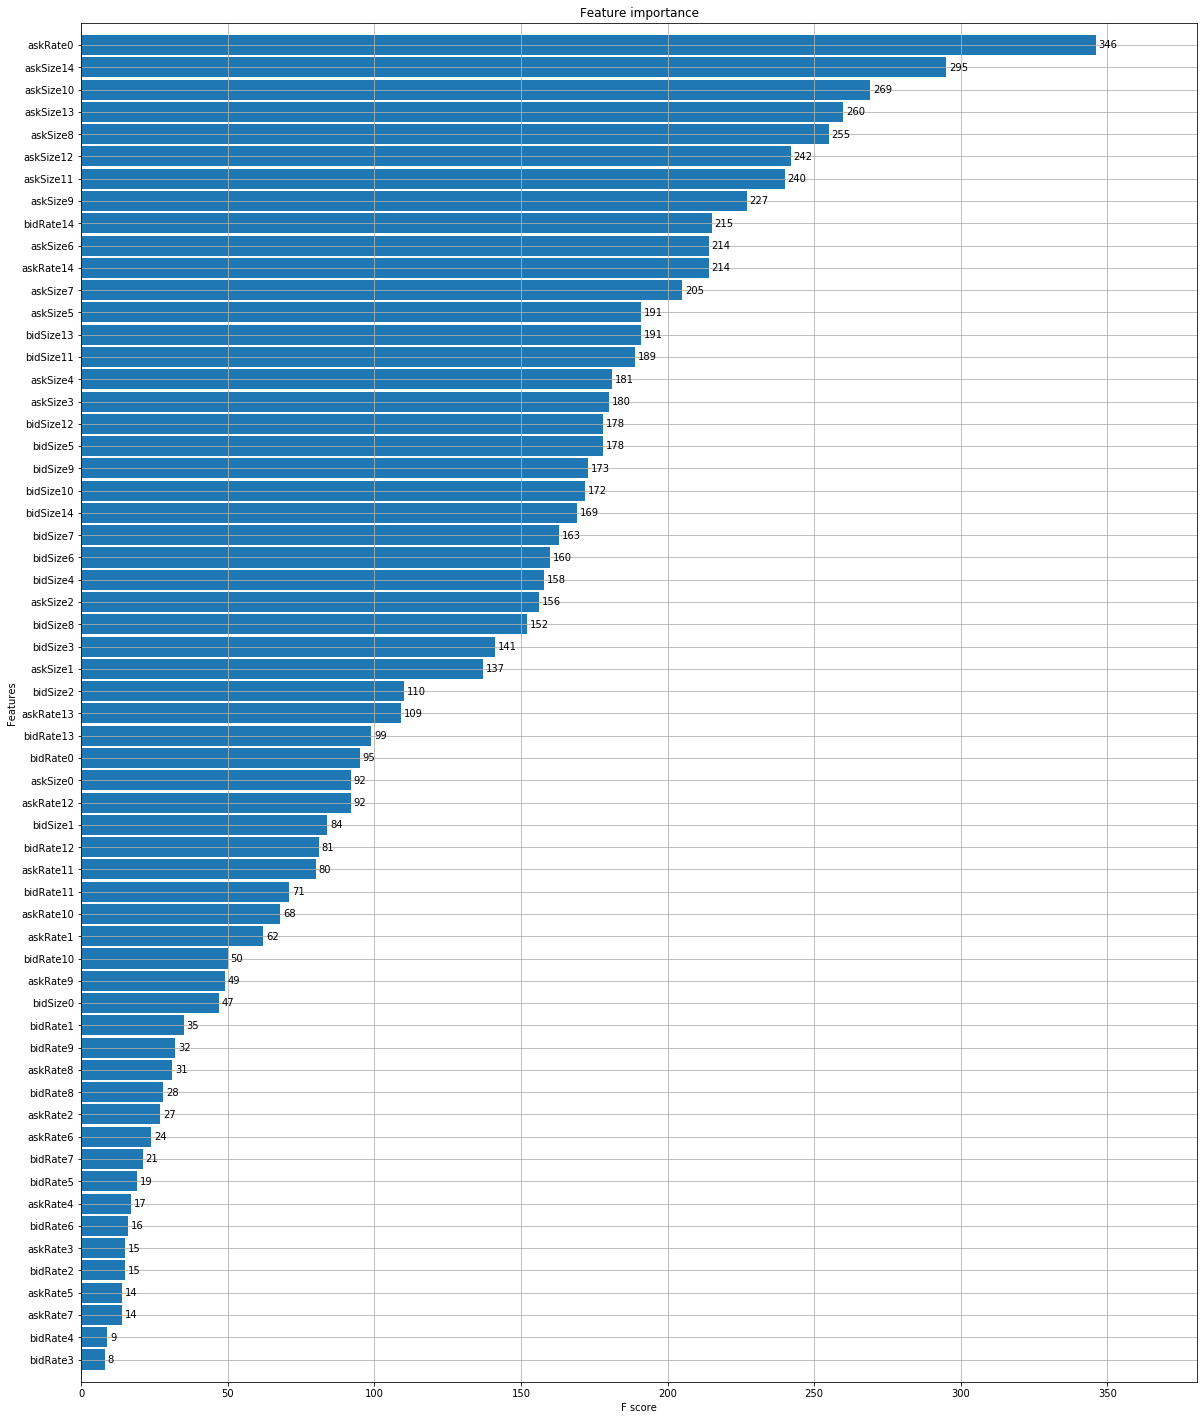

In [7]:
fig, ax = plt.subplots(1,1, figsize = (20, 25))
plot_importance(reg, height = 0.9, ax = ax);

### Forecasting the `test-set`

#### Visualization

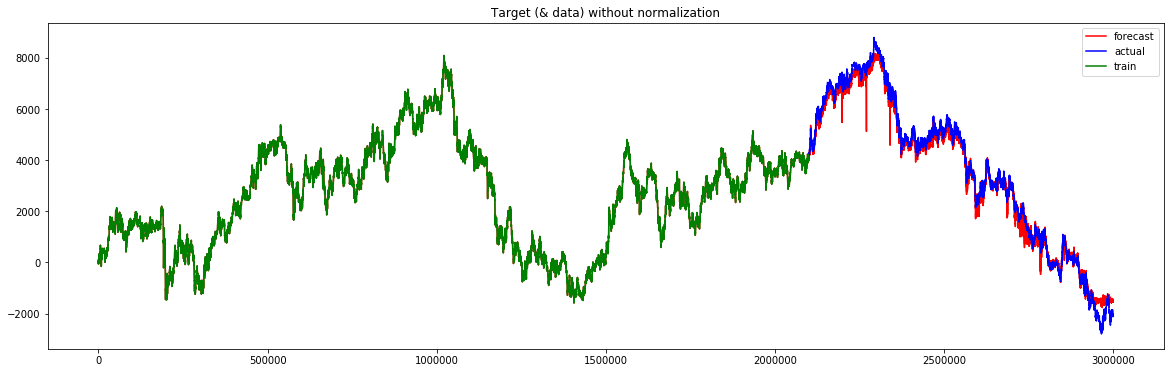

In [8]:
pred = reg.predict(X_test)
def visual_whole_data(train, test, pred, tit = None):
    whole_forecast = np.concatenate((train, pred))
    plt.figure(figsize = (20, 6))
    plt.plot(whole_forecast, 'red', label = 'forecast')
    plt.plot(range(len(train), len(whole_forecast)), test, 'blue', label = 'actual')
    plt.plot(range(len(train)), train, 'green', label = 'train')
    plt.legend(loc = 'best')
    plt.title(tit)
    plt.show()

visual_whole_data(y_train, y_test, pred, 'Target (& data) without normalization')

#### Focus on the `test-set` only

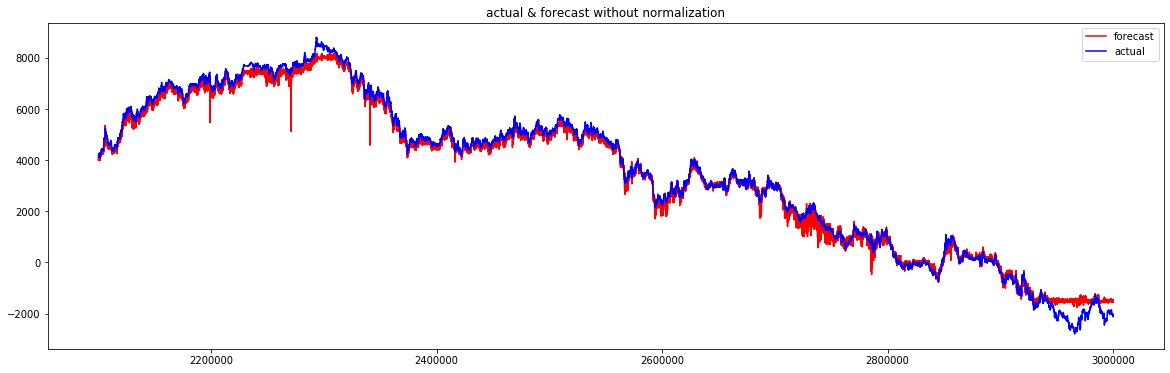

In [9]:
def visual_test_pred_only(train, pred, test, tit = None):
    plt.figure(figsize = (20, 6))
    start = len(train)
    end = len(train) + len(test)
    plt.plot(range(start, end), pred, 'red', label = 'forecast')
    plt.plot(range(start, end), test, 'blue', label = 'actual')
    plt.title(tit)
    plt.legend(loc = 'best')
    plt.show()
    
visual_test_pred_only(y_train, pred, y_test, 'actual & forecast without normalization')

### Error Metrics On Test Set

In [10]:
from statsmodels.tsa.stattools import acf

def forecast_accuracy_2(forecast, actual):
        
    # Mean Error (ME)
    me = np.mean(forecast - actual)  
    
    # Mean Absolute Error (MAE)
    mae = np.mean(np.abs(forecast - actual))
        
    # Root Mean Squared Error (RMSE)
    rmse = np.mean((forecast - actual)**2)**.5 
    
    # correlation
    corr = np.corrcoef(forecast, actual)[0,1]    
        
    # Lag 1 Autocorrelation of Error (ACF1) 
    acf1 = acf(forecast - actual, fft = False)[1] 
    
    return({'me':me, 'mae': mae, 
            'rmse':rmse, 'acf1':acf1, 
            'corr':corr})

%time forecast_accuracy_2(pred, y_test)

Wall time: 2min 22s


{'me': -74.2039885342104,
 'mae': 173.2334046360739,
 'rmse': 237.2084099811824,
 'acf1': 0.9941656440226911,
 'corr': 0.9983538915079289}

The `me & mpe` be negative explained that almost data-points in the `forecast` is lower than in the `actual`!

In this case, we didn't scale anything in dataset so this make the `rmse, me & mae` is `too large` for evaluating!

The high `corr` explained that there are a high-correlation between `actual` & `forecast` while the high `acf1` explained that the `autocovariance` at `lag 1` is apporximate `0.99812` the whole variance on the `test-set`

## 2. XGBoost model with scaling data

In this section, we will study the affects of **`scaling`** to ***`XGBoost's model`***

### 2.1. Using `Normalized` to `features` and `target`

In [11]:
def normalized(data):
    data -= data.mean(axis = 0)
    data /= data.std(axis = 0)
    return data
    
%time x_train_norm = normalized(X_train.copy())
print('before normalizing', y_train[:5].values)
%time y_train_norm = normalized(y_train.copy().ravel())
print('Then', y_train_norm[:5])
x_train_norm.head(3)

Wall time: 7 s
before normalizing [-0.5 -1.  -1.5 -2.  -2.5]
Wall time: 26.9 ms
Then [-1.33691564 -1.33717281 -1.33742997 -1.33768714 -1.33794431]


,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14
0,-0.894282,-0.872851,-0.82829,-67.989836,-66.420351,-64.694256,-63.216521,-61.83422,-60.859209,-59.929705,...,-0.583509,0.37792,0.750628,-0.085265,0.069251,1.026038,-0.151048,-0.57013,-0.194155,-0.101651
1,-0.894282,-0.872851,-0.82829,-0.803530,-66.420351,-64.694256,-63.216521,-61.83422,-60.859209,-59.929705,...,-0.583509,0.37792,0.750628,-0.085265,0.069251,1.026038,-0.151048,-0.57013,-0.194155,-0.101651
2,-0.894282,-0.872851,-0.82829,-0.803530,-0.784173,-64.694256,-63.216521,-61.83422,-60.859209,-59.929705,...,-0.583509,0.37792,0.750628,-0.085265,0.069251,1.026038,-0.151048,-0.57013,-0.194155,-0.101651


In [12]:
%time x_test_norm = normalized(X_test.copy())
%time y_test_norm = normalized(y_test.copy().ravel())

Wall time: 2.82 s
Wall time: 11 ms


In [13]:
reg_2 = xgb.XGBRegressor(n_estimators = 10000)
reg_2.fit(x_train_norm, y_train_norm,
            eval_set = [(x_train_norm, y_train_norm), (x_test_norm, y_test_norm)],
            early_stopping_rounds = 50, verbose = 2)

[0]	validation_0-rmse:0.78575	validation_1-rmse:0.78221
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[2]	validation_0-rmse:0.39284	validation_1-rmse:0.38843
[4]	validation_0-rmse:0.20562	validation_1-rmse:0.19904
[6]	validation_0-rmse:0.12165	validation_1-rmse:0.11842
[8]	validation_0-rmse:0.08886	validation_1-rmse:0.08929
[10]	validation_0-rmse:0.07712	validation_1-rmse:0.08236
[12]	validation_0-rmse:0.07254	validation_1-rmse:0.08124
[14]	validation_0-rmse:0.07000	validation_1-rmse:0.08013
[16]	validation_0-rmse:0.06839	validation_1-rmse:0.08164
[18]	validation_0-rmse:0.06664	validation_1-rmse:0.08063
[20]	validation_0-rmse:0.06534	validation_1-rmse:0.08093
[22]	validation_0-rmse:0.06436	validation_1-rmse:0.08112
[24]	validation_0-rmse:0.06314	validation_1-rmse:0.08123
[26]	validation_0-rmse:0.06247	validation_1-rmse:0.08131
[28]	validation_0-rmse:0.06168	validation_1-rmse

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

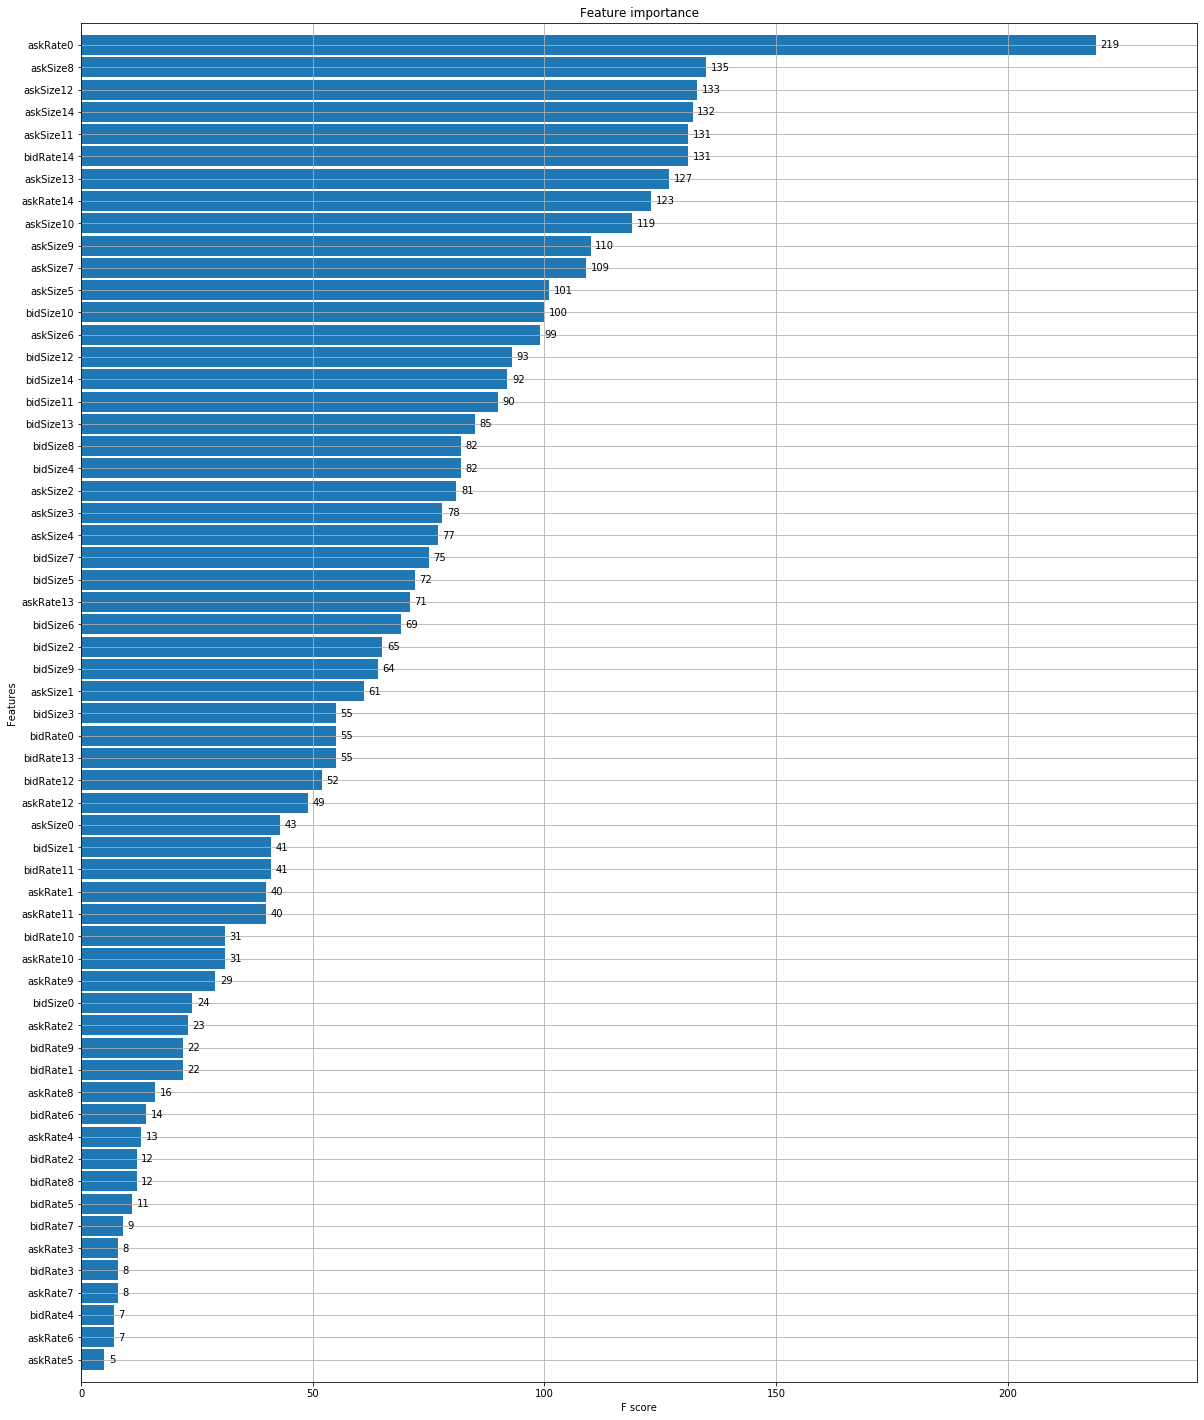

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (20, 25))
plot_importance(reg_2, height = 0.9, ax = ax);

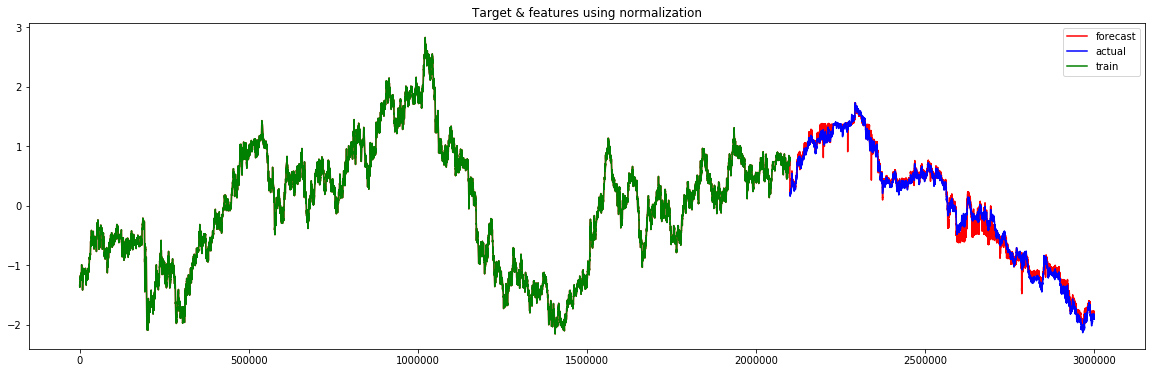

In [15]:
pred_2 = reg_2.predict(x_test_norm)    
visual_whole_data(y_train_norm, y_test_norm, pred_2, 'Target & features using normalization')

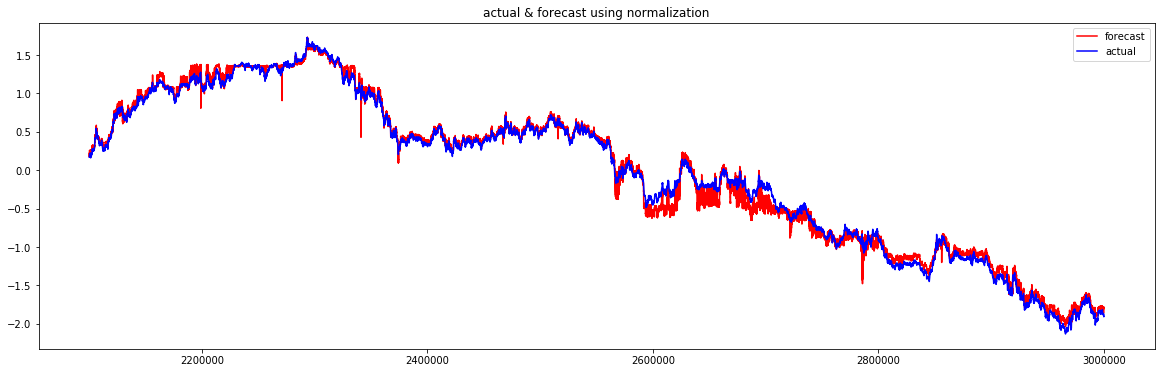

In [16]:
visual_test_pred_only(y_train_norm, pred_2, y_test_norm, 'actual & forecast using normalization')

In [17]:
%time forecast_accuracy_2(pred_2, y_test_norm)

Wall time: 2min 25s


{'me': 0.011412200384603626,
 'mae': 0.05949422491388163,
 'rmse': 0.08001308559354123,
 'acf1': 0.9952336036672061,
 'corr': 0.9968602236882578}

In this case, the values of `MAE` and `RMSE` is pretty good (small enough) to state this is a good prediction!

### 2.2. Using `MinMaxScaler` in `features` while keep `target` with `StandardScaler`

In [18]:
def minmaxscal(data):
    mins = data.min(axis = 0)
    maxs = data.max(axis = 0)
    data -= mins
    data /= maxs
    return data

In [19]:
X_train.head(2)

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14
0,1619.5,1620.0,1621.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0
1,1619.5,1620.0,1621.0,1621.5,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0


In [20]:
x_train_mm = minmaxscal(X_train.copy())
x_train_mm.head(2)

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14
0,0.01791,0.950983,0.951291,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007968,0.07197,0.098485,0.02584,0.032258,0.084367,0.01495,0.0,0.018634,0.024845
1,0.01791,0.950983,0.951291,0.951305,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007968,0.07197,0.098485,0.02584,0.032258,0.084367,0.01495,0.0,0.018634,0.024845


In [21]:
%time x_test_mm = minmaxscal(X_test.copy())

Wall time: 2.08 s


In [22]:
reg_3 = xgb.XGBRegressor(n_estimators = 10000)
reg_3.fit(x_train_mm, y_train_norm,
            eval_set = [(x_train_mm, y_train_norm), (x_test_mm, y_test_norm)],
            early_stopping_rounds = 50, verbose = 2)

[0]	validation_0-rmse:0.78575	validation_1-rmse:0.81017
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[2]	validation_0-rmse:0.39284	validation_1-rmse:0.67604
[4]	validation_0-rmse:0.20562	validation_1-rmse:0.71495
[6]	validation_0-rmse:0.12165	validation_1-rmse:0.76750
[8]	validation_0-rmse:0.08886	validation_1-rmse:0.79600
[10]	validation_0-rmse:0.07712	validation_1-rmse:0.81517
[12]	validation_0-rmse:0.07254	validation_1-rmse:0.82266
[14]	validation_0-rmse:0.07000	validation_1-rmse:0.82599
[16]	validation_0-rmse:0.06839	validation_1-rmse:0.82730
[18]	validation_0-rmse:0.06664	validation_1-rmse:0.82997
[20]	validation_0-rmse:0.06534	validation_1-rmse:0.83002
[22]	validation_0-rmse:0.06436	validation_1-rmse:0.83052
[24]	validation_0-rmse:0.06314	validation_1-rmse:0.83046
[26]	validation_0-rmse:0.06247	validation_1-rmse:0.82974
[28]	validation_0-rmse:0.06168	validation_1-rmse

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

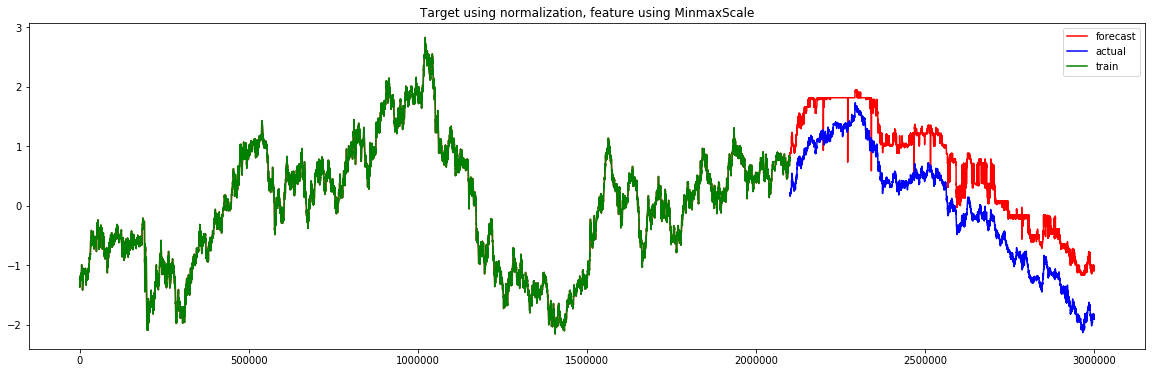

In [23]:
pred_3 = reg_3.predict(x_test_mm)    
visual_whole_data(y_train_norm, y_test_norm, pred_3, 
                  'Target using normalization, feature using MinmaxScale')

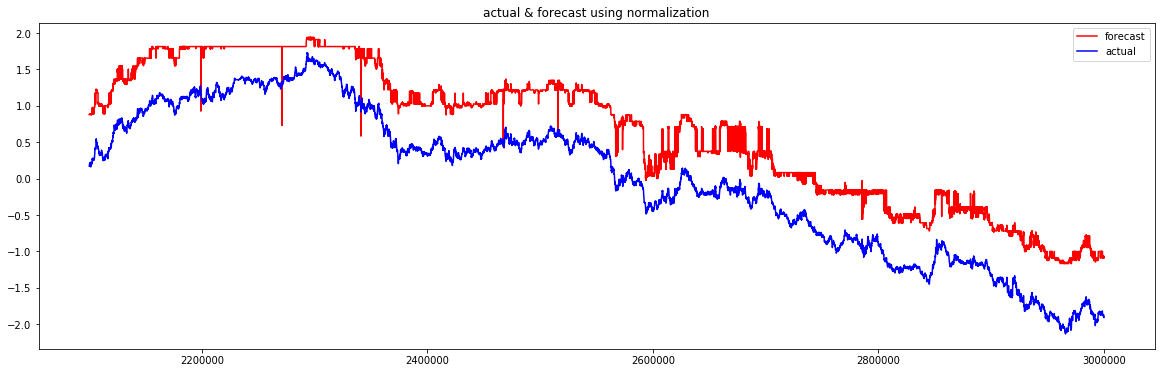

In [24]:
visual_test_pred_only(y_train_norm, pred_3, y_test_norm, 
                      'actual & forecast using normalization')

In [25]:
%time forecast_accuracy_2(pred_3, y_test_norm)

Wall time: 2min 8s


{'me': 0.6642299688406121,
 'mae': 0.6642480484269714,
 'rmse': 0.6760422578470282,
 'acf1': 0.9975218818239819,
 'corr': 0.9940172488280834}

Whether we had `normalized the target` to reduce `me & mae` but using `MinMaxScaler` makes the `mae` and `rmse` is too bad, so this not a good prediction since there is a distances between the `red line (forecast)` and `the blue (actual)`

### 2.3. Using `Normalize` on `features` while keep `target` as `original`

In [26]:
reg_4 = xgb.XGBRegressor(n_estimators = 10000)
reg_4.fit(x_train_norm, y_train,
            eval_set = [(x_train_norm, y_train), (x_test_norm, y_test)],
            early_stopping_rounds = 50, verbose = 2)

[0]	validation_0-rmse:2275.66699	validation_1-rmse:3714.58594
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[2]	validation_0-rmse:1125.37756	validation_1-rmse:2553.78345
[4]	validation_0-rmse:569.35468	validation_1-rmse:1987.21472
[6]	validation_0-rmse:308.84671	validation_1-rmse:1712.70837
[8]	validation_0-rmse:197.56244	validation_1-rmse:1579.72729
[10]	validation_0-rmse:156.35960	validation_1-rmse:1514.49451
[12]	validation_0-rmse:142.03740	validation_1-rmse:1483.82019
[14]	validation_0-rmse:134.19113	validation_1-rmse:1467.78430
[16]	validation_0-rmse:130.04761	validation_1-rmse:1463.73218
[18]	validation_0-rmse:126.97958	validation_1-rmse:1460.90674
[20]	validation_0-rmse:124.67215	validation_1-rmse:1460.14722
[22]	validation_0-rmse:122.85513	validation_1-rmse:1459.72363
[24]	validation_0-rmse:120.98587	validation_1-rmse:1462.11401
[26]	validation_0-rmse:118.26141	valid

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

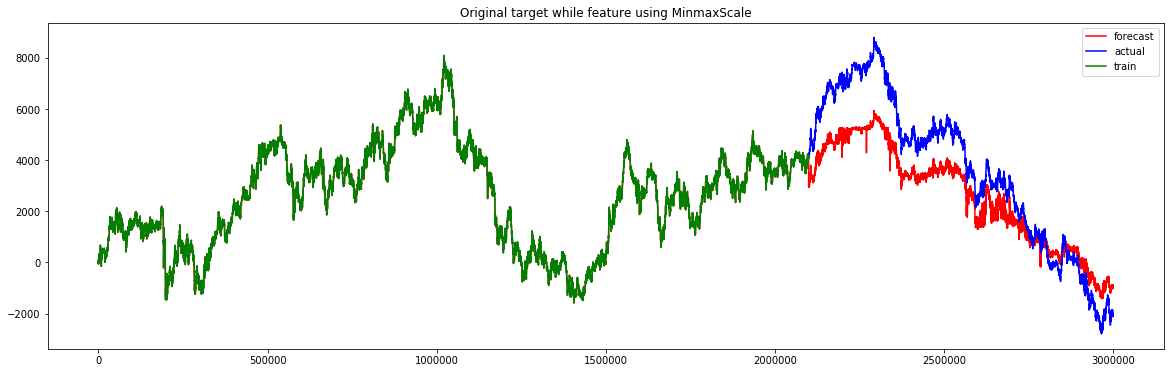

In [27]:
pred_4 = reg_4.predict(x_test_norm)    
visual_whole_data(y_train, y_test, pred_4, 
                  'Original target while feature using MinmaxScale')

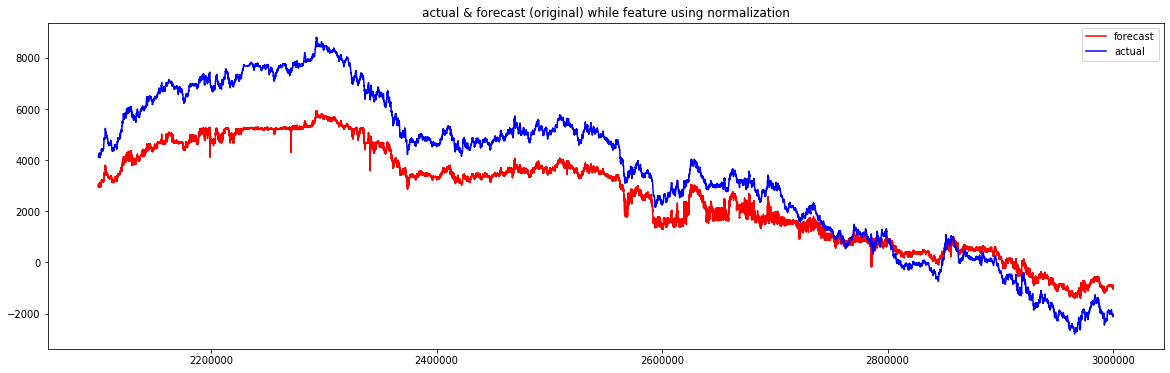

In [28]:
visual_test_pred_only(y_train, pred_4, y_test, 
                      'actual & forecast (original) while feature using normalization')

In [29]:
%time forecast_accuracy_2(pred_4, y_test)

Wall time: 2min 11s


{'me': -992.0755755179084,
 'mae': 1283.6123759944335,
 'rmse': 1459.72676539916,
 'acf1': 0.9998918792573492,
 'corr': 0.9966869272068205}

Also, this approach is not a good method to XGBoost model!

### 2.4. Interchange 2.2

In [30]:
%time y_train_mm = minmaxscal(y_train.copy().ravel())
%time y_test_mm = minmaxscal(y_test.copy().ravel())

Wall time: 16 ms
Wall time: 6.98 ms


In [31]:
reg_5 = xgb.XGBRegressor(n_estimators = 10000)
reg_5.fit(x_train_norm, y_train_mm,
            eval_set = [(x_train_norm, y_train_mm), (x_test_norm, y_test_mm)],
            early_stopping_rounds = 50, verbose = 2)

[0]	validation_0-rmse:0.16948	validation_1-rmse:0.34896
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[2]	validation_0-rmse:0.08514	validation_1-rmse:0.28251
[4]	validation_0-rmse:0.04524	validation_1-rmse:0.25436
[6]	validation_0-rmse:0.02756	validation_1-rmse:0.24228
[8]	validation_0-rmse:0.02071	validation_1-rmse:0.23689
[10]	validation_0-rmse:0.01826	validation_1-rmse:0.23431
[12]	validation_0-rmse:0.01724	validation_1-rmse:0.23328
[14]	validation_0-rmse:0.01663	validation_1-rmse:0.23282
[16]	validation_0-rmse:0.01612	validation_1-rmse:0.23256
[18]	validation_0-rmse:0.01572	validation_1-rmse:0.23283
[20]	validation_0-rmse:0.01541	validation_1-rmse:0.23309
[22]	validation_0-rmse:0.01520	validation_1-rmse:0.23328
[24]	validation_0-rmse:0.01504	validation_1-rmse:0.23329
[26]	validation_0-rmse:0.01480	validation_1-rmse:0.23324
[28]	validation_0-rmse:0.01460	validation_1-rmse

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

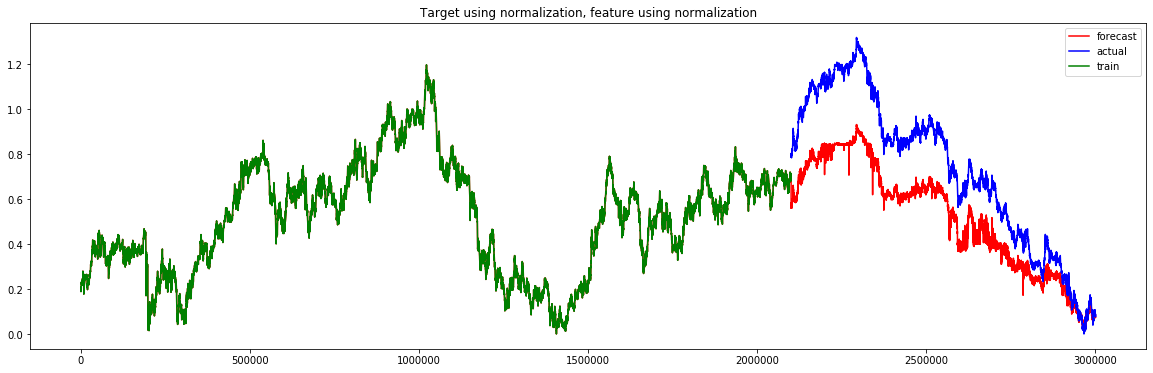

In [32]:
pred_5 = reg_5.predict(x_test_norm)    
visual_whole_data(y_train_mm, y_test_mm, pred_5, 
                  'Target using normalization, feature using normalization')

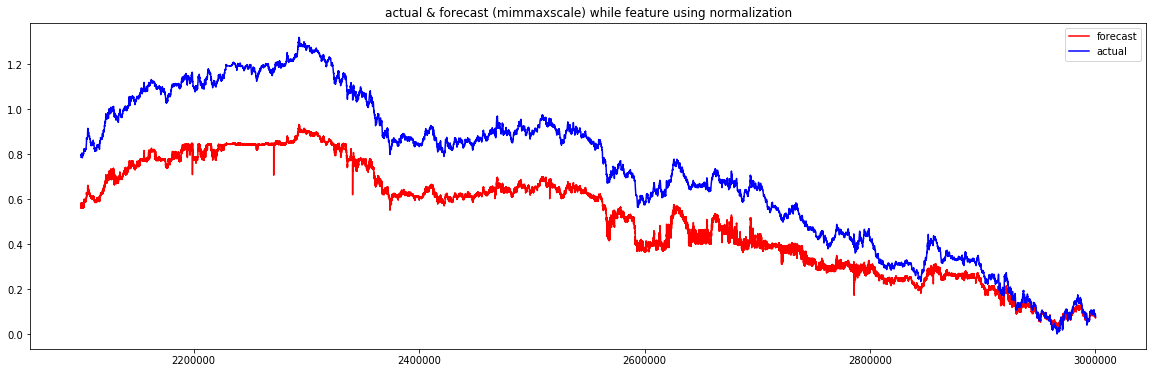

In [33]:
visual_test_pred_only(y_train_mm, pred_5, y_test_mm, 
                      'actual & forecast (mimmaxscale) while feature using normalization')

In [34]:
%time forecast_accuracy_2(pred_5, y_test_mm)

Wall time: 2min 7s


{'me': -0.20837681752116416,
 'mae': 0.20885003522944565,
 'rmse': 0.2325380773702283,
 'acf1': 0.9998329042325304,
 'corr': 0.9967819945320632}

### 2.5. `MinMaxScaler` on `features` while keeping `target` as `original`

In [35]:
reg_6 = xgb.XGBRegressor(n_estimators = 10000)
reg_6.fit(x_train_mm, y_train,
            eval_set = [(x_train_mm, y_train), (x_test_mm, y_test)],
            early_stopping_rounds = 50, verbose = 2)

[0]	validation_0-rmse:2275.66699	validation_1-rmse:3212.23389
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[2]	validation_0-rmse:1125.37756	validation_1-rmse:1537.40063
[4]	validation_0-rmse:569.35468	validation_1-rmse:814.29346
[6]	validation_0-rmse:308.84671	validation_1-rmse:545.21509
[8]	validation_0-rmse:197.56244	validation_1-rmse:494.06473
[10]	validation_0-rmse:156.35960	validation_1-rmse:496.86356
[12]	validation_0-rmse:142.03740	validation_1-rmse:507.96860
[14]	validation_0-rmse:134.19113	validation_1-rmse:514.77508
[16]	validation_0-rmse:130.04761	validation_1-rmse:519.15118
[18]	validation_0-rmse:126.97958	validation_1-rmse:521.68457
[20]	validation_0-rmse:124.67215	validation_1-rmse:526.05463
[22]	validation_0-rmse:122.85513	validation_1-rmse:529.82788
[24]	validation_0-rmse:120.98587	validation_1-rmse:530.52191
[26]	validation_0-rmse:118.26141	validation_1-rms

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

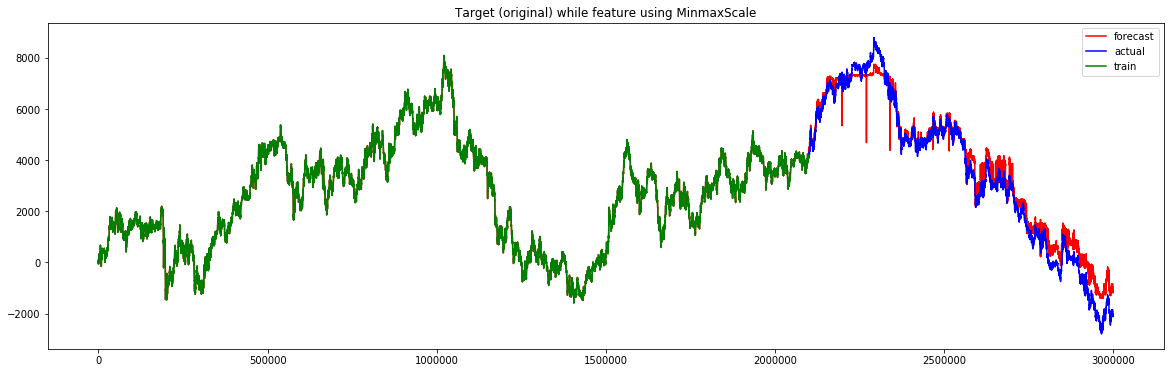

In [36]:
pred_6 = reg_6.predict(x_test_mm)    
visual_whole_data(y_train, y_test, pred_6, 
                  'Target (original) while feature using MinmaxScale')

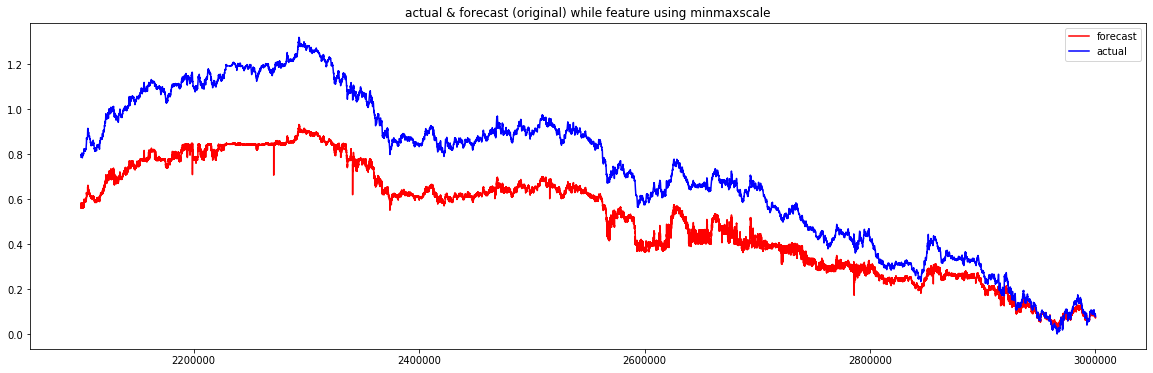

In [37]:
visual_test_pred_only(y_train_mm, pred_5, y_test_mm, 
                      'actual & forecast (original) while feature using minmaxscale')

In [38]:
%time forecast_accuracy_2(pred_6, y_test)

Wall time: 2min 9s


{'me': 276.5916990301037,
 'mae': 387.39906637609164,
 'rmse': 493.56767433898835,
 'acf1': 0.9987897804984319,
 'corr': 0.9964553975017557}

### Conclusion Section 2. 

**The `2nd's approach: normalize dataset` give the best `rmse, me, mae` among all the approaches we have tried in this file, until now**


**In the later section** we will use `normalize dataset` combine with `Grid-search CV` to find the best model give the lowest `mae & rmse`

### 3. Apply `grid-search CV` to `XGBoost`

In [39]:
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBRegressor()
params = {'n_estimators': [1000, 10000, 20000], 
          'max_depth': [5, 7],
          'learning_rate': [0.3, 0.1],
          'min_child_weight': [1, 3]
         }
clf = GridSearchCV(xgb_model, params)

In [40]:
clf.fit(x_train_norm, y_train_norm, 
        eval_set=[(x_train_norm, y_train_norm), (x_test_norm, y_test_norm)],
        early_stopping_rounds = 20,
        verbose = 2)

[0]	validation_0-rmse:0.80174	validation_1-rmse:0.79574
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[2]	validation_0-rmse:0.43086	validation_1-rmse:0.41344
[4]	validation_0-rmse:0.25894	validation_1-rmse:0.22644
[6]	validation_0-rmse:0.18516	validation_1-rmse:0.13769
[8]	validation_0-rmse:0.15591	validation_1-rmse:0.09695
[10]	validation_0-rmse:0.14407	validation_1-rmse:0.07995
[12]	validation_0-rmse:0.13920	validation_1-rmse:0.07237
[14]	validation_0-rmse:0.13706	validation_1-rmse:0.06845
[16]	validation_0-rmse:0.13602	validation_1-rmse:0.06683
[18]	validation_0-rmse:0.13559	validation_1-rmse:0.06634
[20]	validation_0-rmse:0.13503	validation_1-rmse:0.06556
[22]	validation_0-rmse:0.13473	validation_1-rmse:0.06521
[24]	validation_0-rmse:0.13452	validation_1-rmse:0.06490
[26]	validation_0-rmse:0.13443	validation_1-rmse:0.06441
[28]	validation_0-rmse:0.13439	validation_1-rmse

[16]	validation_0-rmse:0.13602	validation_1-rmse:0.06683
[18]	validation_0-rmse:0.13559	validation_1-rmse:0.06634
[20]	validation_0-rmse:0.13503	validation_1-rmse:0.06556
[22]	validation_0-rmse:0.13473	validation_1-rmse:0.06521
[24]	validation_0-rmse:0.13452	validation_1-rmse:0.06490
[26]	validation_0-rmse:0.13443	validation_1-rmse:0.06441
[28]	validation_0-rmse:0.13439	validation_1-rmse:0.06438
[30]	validation_0-rmse:0.13443	validation_1-rmse:0.06436
[32]	validation_0-rmse:0.13422	validation_1-rmse:0.06408
[34]	validation_0-rmse:0.13419	validation_1-rmse:0.06394
[36]	validation_0-rmse:0.13409	validation_1-rmse:0.06385
[38]	validation_0-rmse:0.13414	validation_1-rmse:0.06387
[40]	validation_0-rmse:0.13407	validation_1-rmse:0.06378
[42]	validation_0-rmse:0.13387	validation_1-rmse:0.06365
[44]	validation_0-rmse:0.13382	validation_1-rmse:0.06360
[46]	validation_0-rmse:0.13381	validation_1-rmse:0.06341
[48]	validation_0-rmse:0.13387	validation_1-rmse:0.06343
[50]	validation_0-rmse:0.13378	

[36]	validation_0-rmse:0.13409	validation_1-rmse:0.06385
[38]	validation_0-rmse:0.13414	validation_1-rmse:0.06387
[40]	validation_0-rmse:0.13407	validation_1-rmse:0.06378
[42]	validation_0-rmse:0.13387	validation_1-rmse:0.06365
[44]	validation_0-rmse:0.13382	validation_1-rmse:0.06360
[46]	validation_0-rmse:0.13381	validation_1-rmse:0.06341
[48]	validation_0-rmse:0.13387	validation_1-rmse:0.06343
[50]	validation_0-rmse:0.13378	validation_1-rmse:0.06317
[52]	validation_0-rmse:0.13377	validation_1-rmse:0.06319
[54]	validation_0-rmse:0.13380	validation_1-rmse:0.06312
[56]	validation_0-rmse:0.13395	validation_1-rmse:0.06335
[58]	validation_0-rmse:0.13385	validation_1-rmse:0.06331
[60]	validation_0-rmse:0.13394	validation_1-rmse:0.06336
[62]	validation_0-rmse:0.13390	validation_1-rmse:0.06337
[64]	validation_0-rmse:0.13377	validation_1-rmse:0.06335
[66]	validation_0-rmse:0.13367	validation_1-rmse:0.06316
[68]	validation_0-rmse:0.13362	validation_1-rmse:0.06287
[70]	validation_0-rmse:0.13340	

[56]	validation_0-rmse:0.13395	validation_1-rmse:0.06335
[58]	validation_0-rmse:0.13385	validation_1-rmse:0.06331
[60]	validation_0-rmse:0.13394	validation_1-rmse:0.06336
[62]	validation_0-rmse:0.13390	validation_1-rmse:0.06337
[64]	validation_0-rmse:0.13377	validation_1-rmse:0.06335
[66]	validation_0-rmse:0.13367	validation_1-rmse:0.06316
[68]	validation_0-rmse:0.13362	validation_1-rmse:0.06287
[70]	validation_0-rmse:0.13340	validation_1-rmse:0.06295
[72]	validation_0-rmse:0.13342	validation_1-rmse:0.06309
[74]	validation_0-rmse:0.13346	validation_1-rmse:0.06324
[76]	validation_0-rmse:0.13344	validation_1-rmse:0.06325
[78]	validation_0-rmse:0.13348	validation_1-rmse:0.06322
[80]	validation_0-rmse:0.13342	validation_1-rmse:0.06325
[82]	validation_0-rmse:0.13348	validation_1-rmse:0.06314
[84]	validation_0-rmse:0.13341	validation_1-rmse:0.06317
[86]	validation_0-rmse:0.13331	validation_1-rmse:0.06320
Stopping. Best iteration:
[67]	validation_0-rmse:0.13366	validation_1-rmse:0.06284

[0]	

[76]	validation_0-rmse:0.13344	validation_1-rmse:0.06325
[78]	validation_0-rmse:0.13348	validation_1-rmse:0.06322
[80]	validation_0-rmse:0.13342	validation_1-rmse:0.06325
[82]	validation_0-rmse:0.13348	validation_1-rmse:0.06314
[84]	validation_0-rmse:0.13341	validation_1-rmse:0.06317
[86]	validation_0-rmse:0.13331	validation_1-rmse:0.06320
Stopping. Best iteration:
[67]	validation_0-rmse:0.13366	validation_1-rmse:0.06284

[0]	validation_0-rmse:0.78600	validation_1-rmse:0.78209
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[2]	validation_0-rmse:0.39398	validation_1-rmse:0.38636
[4]	validation_0-rmse:0.20876	validation_1-rmse:0.20088
[6]	validation_0-rmse:0.12827	validation_1-rmse:0.12564
[8]	validation_0-rmse:0.09901	validation_1-rmse:0.10212
[10]	validation_0-rmse:0.08939	validation_1-rmse:0.09880
[12]	validation_0-rmse:0.08619	validation_1-rmse:0.09768
[14]	validation_0-rms

Will train until validation_1-rmse hasn't improved in 20 rounds.
[2]	validation_0-rmse:0.39398	validation_1-rmse:0.38636
[4]	validation_0-rmse:0.20876	validation_1-rmse:0.20088
[6]	validation_0-rmse:0.12827	validation_1-rmse:0.12564
[8]	validation_0-rmse:0.09901	validation_1-rmse:0.10212
[10]	validation_0-rmse:0.08939	validation_1-rmse:0.09880
[12]	validation_0-rmse:0.08619	validation_1-rmse:0.09768
[14]	validation_0-rmse:0.08447	validation_1-rmse:0.09689
[16]	validation_0-rmse:0.08328	validation_1-rmse:0.09575
[18]	validation_0-rmse:0.08204	validation_1-rmse:0.09596
[20]	validation_0-rmse:0.08114	validation_1-rmse:0.09556
[22]	validation_0-rmse:0.08005	validation_1-rmse:0.09544
[24]	validation_0-rmse:0.07910	validation_1-rmse:0.09567
[26]	validation_0-rmse:0.07860	validation_1-rmse:0.09630
[28]	validation_0-rmse:0.07806	validation_1-rmse:0.09651
[30]	validation_0-rmse:0.07712	validation_1-rmse:0.09707
[32]	validation_0-rmse:0.07678	validation_1-rmse:0.09716
[34]	validation_0-rmse:0.07

[4]	validation_0-rmse:0.26974	validation_1-rmse:0.20478
[6]	validation_0-rmse:0.20505	validation_1-rmse:0.12572
[8]	validation_0-rmse:0.18266	validation_1-rmse:0.09819
[10]	validation_0-rmse:0.17486	validation_1-rmse:0.09142
[12]	validation_0-rmse:0.17174	validation_1-rmse:0.08934
[14]	validation_0-rmse:0.17049	validation_1-rmse:0.08954
[16]	validation_0-rmse:0.17013	validation_1-rmse:0.08981
[18]	validation_0-rmse:0.16956	validation_1-rmse:0.08955
[20]	validation_0-rmse:0.16933	validation_1-rmse:0.09016
[22]	validation_0-rmse:0.16883	validation_1-rmse:0.08994
[24]	validation_0-rmse:0.16863	validation_1-rmse:0.09002
[26]	validation_0-rmse:0.16841	validation_1-rmse:0.09048
[28]	validation_0-rmse:0.16807	validation_1-rmse:0.09065
[30]	validation_0-rmse:0.16793	validation_1-rmse:0.09112
[32]	validation_0-rmse:0.16786	validation_1-rmse:0.09120
Stopping. Best iteration:
[13]	validation_0-rmse:0.17095	validation_1-rmse:0.08886

[0]	validation_0-rmse:0.77886	validation_1-rmse:0.77568
Multiple

[16]	validation_0-rmse:0.06679	validation_1-rmse:0.08701
[18]	validation_0-rmse:0.06602	validation_1-rmse:0.08854
[20]	validation_0-rmse:0.06572	validation_1-rmse:0.08888
[22]	validation_0-rmse:0.06514	validation_1-rmse:0.08966
[24]	validation_0-rmse:0.06401	validation_1-rmse:0.08957
[26]	validation_0-rmse:0.06329	validation_1-rmse:0.08980
[28]	validation_0-rmse:0.06279	validation_1-rmse:0.08982
Stopping. Best iteration:
[9]	validation_0-rmse:0.07087	validation_1-rmse:0.08417

[0]	validation_0-rmse:0.78325	validation_1-rmse:0.77873
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[2]	validation_0-rmse:0.38808	validation_1-rmse:0.38219
[4]	validation_0-rmse:0.20026	validation_1-rmse:0.19753
[6]	validation_0-rmse:0.11707	validation_1-rmse:0.12246
[8]	validation_0-rmse:0.08588	validation_1-rmse:0.10108
[10]	validation_0-rmse:0.07596	validation_1-rmse:0.09650
[12]	validation_0-rmse

Stopping. Best iteration:
[10]	validation_0-rmse:0.07596	validation_1-rmse:0.09650

[0]	validation_0-rmse:0.80108	validation_1-rmse:0.79604
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[2]	validation_0-rmse:0.42961	validation_1-rmse:0.41266
[4]	validation_0-rmse:0.25746	validation_1-rmse:0.22576
[6]	validation_0-rmse:0.18369	validation_1-rmse:0.13617
[8]	validation_0-rmse:0.15414	validation_1-rmse:0.09531
[10]	validation_0-rmse:0.14283	validation_1-rmse:0.07726
[12]	validation_0-rmse:0.13797	validation_1-rmse:0.06908
[14]	validation_0-rmse:0.13570	validation_1-rmse:0.06527
[16]	validation_0-rmse:0.13457	validation_1-rmse:0.06348
[18]	validation_0-rmse:0.13418	validation_1-rmse:0.06267
[20]	validation_0-rmse:0.13385	validation_1-rmse:0.06195
[22]	validation_0-rmse:0.13350	validation_1-rmse:0.06152
[24]	validation_0-rmse:0.13311	validation_1-rmse:0.06096
[26]	validation_0-rms

[34]	validation_0-rmse:0.13263	validation_1-rmse:0.06002
[36]	validation_0-rmse:0.13263	validation_1-rmse:0.06010
[38]	validation_0-rmse:0.13262	validation_1-rmse:0.05998
[40]	validation_0-rmse:0.13261	validation_1-rmse:0.05999
[42]	validation_0-rmse:0.13251	validation_1-rmse:0.05995
[44]	validation_0-rmse:0.13245	validation_1-rmse:0.06005
[46]	validation_0-rmse:0.13234	validation_1-rmse:0.05993
[48]	validation_0-rmse:0.13227	validation_1-rmse:0.05989
[50]	validation_0-rmse:0.13229	validation_1-rmse:0.05990
[52]	validation_0-rmse:0.13225	validation_1-rmse:0.05994
[54]	validation_0-rmse:0.13204	validation_1-rmse:0.05988
[56]	validation_0-rmse:0.13202	validation_1-rmse:0.05984
[58]	validation_0-rmse:0.13197	validation_1-rmse:0.06007
[60]	validation_0-rmse:0.13198	validation_1-rmse:0.06008
[62]	validation_0-rmse:0.13197	validation_1-rmse:0.06004
[64]	validation_0-rmse:0.13196	validation_1-rmse:0.06003
[66]	validation_0-rmse:0.13192	validation_1-rmse:0.05987
[68]	validation_0-rmse:0.13193	

[0]	validation_0-rmse:0.78470	validation_1-rmse:0.78224
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[2]	validation_0-rmse:0.39049	validation_1-rmse:0.38686
[4]	validation_0-rmse:0.20272	validation_1-rmse:0.20242
[6]	validation_0-rmse:0.11906	validation_1-rmse:0.12623
[8]	validation_0-rmse:0.08665	validation_1-rmse:0.10243
[10]	validation_0-rmse:0.07577	validation_1-rmse:0.09692
[12]	validation_0-rmse:0.07218	validation_1-rmse:0.09640
[14]	validation_0-rmse:0.07032	validation_1-rmse:0.09589
[16]	validation_0-rmse:0.06862	validation_1-rmse:0.09712
[18]	validation_0-rmse:0.06712	validation_1-rmse:0.09762
[20]	validation_0-rmse:0.06627	validation_1-rmse:0.09787
[22]	validation_0-rmse:0.06528	validation_1-rmse:0.09787
[24]	validation_0-rmse:0.06439	validation_1-rmse:0.09828
[26]	validation_0-rmse:0.06367	validation_1-rmse:0.09839
[28]	validation_0-rmse:0.06302	validation_1-rmse

[120]	validation_0-rmse:0.13349	validation_1-rmse:0.06005
[122]	validation_0-rmse:0.13351	validation_1-rmse:0.06005
[124]	validation_0-rmse:0.13350	validation_1-rmse:0.06004
[126]	validation_0-rmse:0.13348	validation_1-rmse:0.06007
[128]	validation_0-rmse:0.13351	validation_1-rmse:0.06009
[130]	validation_0-rmse:0.13348	validation_1-rmse:0.05996
[132]	validation_0-rmse:0.13349	validation_1-rmse:0.05993
[134]	validation_0-rmse:0.13350	validation_1-rmse:0.05989
[136]	validation_0-rmse:0.13350	validation_1-rmse:0.05987
[138]	validation_0-rmse:0.13347	validation_1-rmse:0.05983
[140]	validation_0-rmse:0.13345	validation_1-rmse:0.05985
[142]	validation_0-rmse:0.13347	validation_1-rmse:0.05986
[144]	validation_0-rmse:0.13345	validation_1-rmse:0.05985
[146]	validation_0-rmse:0.13344	validation_1-rmse:0.05985
[148]	validation_0-rmse:0.13343	validation_1-rmse:0.05970
[150]	validation_0-rmse:0.13346	validation_1-rmse:0.05966
[152]	validation_0-rmse:0.13343	validation_1-rmse:0.05963
[154]	validati

[44]	validation_0-rmse:0.08008	validation_1-rmse:0.08060
[46]	validation_0-rmse:0.07980	validation_1-rmse:0.08086
[48]	validation_0-rmse:0.07961	validation_1-rmse:0.08135
[50]	validation_0-rmse:0.07933	validation_1-rmse:0.08169
[52]	validation_0-rmse:0.07917	validation_1-rmse:0.08244
[54]	validation_0-rmse:0.07895	validation_1-rmse:0.08280
[56]	validation_0-rmse:0.07875	validation_1-rmse:0.08309
Stopping. Best iteration:
[36]	validation_0-rmse:0.08203	validation_1-rmse:0.07975

[0]	validation_0-rmse:1.00650	validation_1-rmse:1.00476
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[2]	validation_0-rmse:0.81617	validation_1-rmse:0.81283
[4]	validation_0-rmse:0.66237	validation_1-rmse:0.65701
[6]	validation_0-rmse:0.53831	validation_1-rmse:0.53102
[8]	validation_0-rmse:0.43849	validation_1-rmse:0.42950
[10]	validation_0-rmse:0.35835	validation_1-rmse:0.34831
[12]	validation_0-rms

[192]	validation_0-rmse:0.13324	validation_1-rmse:0.05937
[194]	validation_0-rmse:0.13326	validation_1-rmse:0.05937
[196]	validation_0-rmse:0.13323	validation_1-rmse:0.05936
[198]	validation_0-rmse:0.13318	validation_1-rmse:0.05934
[200]	validation_0-rmse:0.13316	validation_1-rmse:0.05936
[202]	validation_0-rmse:0.13315	validation_1-rmse:0.05936
[204]	validation_0-rmse:0.13314	validation_1-rmse:0.05935
[206]	validation_0-rmse:0.13313	validation_1-rmse:0.05938
Stopping. Best iteration:
[187]	validation_0-rmse:0.13326	validation_1-rmse:0.05933

[0]	validation_0-rmse:1.00719	validation_1-rmse:1.00590
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[2]	validation_0-rmse:0.81783	validation_1-rmse:0.81377
[4]	validation_0-rmse:0.66476	validation_1-rmse:0.65926
[6]	validation_0-rmse:0.54124	validation_1-rmse:0.53473
[8]	validation_0-rmse:0.44171	validation_1-rmse:0.43411
[10]	validat

[50]	validation_0-rmse:0.08297	validation_1-rmse:0.09317
[52]	validation_0-rmse:0.08265	validation_1-rmse:0.09347
[54]	validation_0-rmse:0.08219	validation_1-rmse:0.09322
[56]	validation_0-rmse:0.08169	validation_1-rmse:0.09390
[58]	validation_0-rmse:0.08156	validation_1-rmse:0.09412
[60]	validation_0-rmse:0.08143	validation_1-rmse:0.09431
[62]	validation_0-rmse:0.08102	validation_1-rmse:0.09437
Stopping. Best iteration:
[42]	validation_0-rmse:0.08533	validation_1-rmse:0.09177

[0]	validation_0-rmse:1.01233	validation_1-rmse:1.01053
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[2]	validation_0-rmse:0.83213	validation_1-rmse:0.82669
[4]	validation_0-rmse:0.68685	validation_1-rmse:0.67723
[6]	validation_0-rmse:0.56992	validation_1-rmse:0.55609
[8]	validation_0-rmse:0.47600	validation_1-rmse:0.45869
[10]	validation_0-rmse:0.40098	validation_1-rmse:0.37999
[12]	validation_0-rms

[48]	validation_0-rmse:0.08113	validation_1-rmse:0.09182
[50]	validation_0-rmse:0.08065	validation_1-rmse:0.09225
[52]	validation_0-rmse:0.08030	validation_1-rmse:0.09228
[54]	validation_0-rmse:0.08006	validation_1-rmse:0.09267
[56]	validation_0-rmse:0.07977	validation_1-rmse:0.09280
[58]	validation_0-rmse:0.07946	validation_1-rmse:0.09298
[60]	validation_0-rmse:0.07927	validation_1-rmse:0.09301
[62]	validation_0-rmse:0.07914	validation_1-rmse:0.09298
[64]	validation_0-rmse:0.07882	validation_1-rmse:0.09322
[66]	validation_0-rmse:0.07846	validation_1-rmse:0.09300
[68]	validation_0-rmse:0.07823	validation_1-rmse:0.09318
Stopping. Best iteration:
[48]	validation_0-rmse:0.08113	validation_1-rmse:0.09182

[0]	validation_0-rmse:1.01334	validation_1-rmse:1.00728
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[2]	validation_0-rmse:0.83530	validation_1-rmse:0.81833
[4]	validation_0-r

[52]	validation_0-rmse:0.13644	validation_1-rmse:0.06442
[54]	validation_0-rmse:0.13612	validation_1-rmse:0.06393
[56]	validation_0-rmse:0.13582	validation_1-rmse:0.06352
[58]	validation_0-rmse:0.13563	validation_1-rmse:0.06322
[60]	validation_0-rmse:0.13544	validation_1-rmse:0.06299
[62]	validation_0-rmse:0.13518	validation_1-rmse:0.06260
[64]	validation_0-rmse:0.13505	validation_1-rmse:0.06251
[66]	validation_0-rmse:0.13495	validation_1-rmse:0.06243
[68]	validation_0-rmse:0.13477	validation_1-rmse:0.06225
[70]	validation_0-rmse:0.13471	validation_1-rmse:0.06220
[72]	validation_0-rmse:0.13463	validation_1-rmse:0.06197
[74]	validation_0-rmse:0.13455	validation_1-rmse:0.06191
[76]	validation_0-rmse:0.13445	validation_1-rmse:0.06179
[78]	validation_0-rmse:0.13436	validation_1-rmse:0.06159
[80]	validation_0-rmse:0.13428	validation_1-rmse:0.06150
[82]	validation_0-rmse:0.13420	validation_1-rmse:0.06121
[84]	validation_0-rmse:0.13414	validation_1-rmse:0.06113
[86]	validation_0-rmse:0.13410	

[24]	validation_0-rmse:0.21468	validation_1-rmse:0.11648
[26]	validation_0-rmse:0.20690	validation_1-rmse:0.10673
[28]	validation_0-rmse:0.20016	validation_1-rmse:0.09874
[30]	validation_0-rmse:0.19649	validation_1-rmse:0.09402
[32]	validation_0-rmse:0.19402	validation_1-rmse:0.09045
[34]	validation_0-rmse:0.19091	validation_1-rmse:0.08789
[36]	validation_0-rmse:0.18949	validation_1-rmse:0.08663
[38]	validation_0-rmse:0.18848	validation_1-rmse:0.08583
[40]	validation_0-rmse:0.18756	validation_1-rmse:0.08574
[42]	validation_0-rmse:0.18710	validation_1-rmse:0.08587
[44]	validation_0-rmse:0.18675	validation_1-rmse:0.08620
[46]	validation_0-rmse:0.18631	validation_1-rmse:0.08668
[48]	validation_0-rmse:0.18590	validation_1-rmse:0.08642
[50]	validation_0-rmse:0.18571	validation_1-rmse:0.08685
[52]	validation_0-rmse:0.18564	validation_1-rmse:0.08739
[54]	validation_0-rmse:0.18540	validation_1-rmse:0.08722
[56]	validation_0-rmse:0.18525	validation_1-rmse:0.08750
[58]	validation_0-rmse:0.18498	

[106]	validation_0-rmse:0.13365	validation_1-rmse:0.06046
[108]	validation_0-rmse:0.13363	validation_1-rmse:0.06040
[110]	validation_0-rmse:0.13360	validation_1-rmse:0.06038
[112]	validation_0-rmse:0.13360	validation_1-rmse:0.06041
[114]	validation_0-rmse:0.13354	validation_1-rmse:0.06021
[116]	validation_0-rmse:0.13357	validation_1-rmse:0.06020
[118]	validation_0-rmse:0.13351	validation_1-rmse:0.06017
[120]	validation_0-rmse:0.13349	validation_1-rmse:0.06005
[122]	validation_0-rmse:0.13351	validation_1-rmse:0.06005
[124]	validation_0-rmse:0.13350	validation_1-rmse:0.06004
[126]	validation_0-rmse:0.13348	validation_1-rmse:0.06007
[128]	validation_0-rmse:0.13351	validation_1-rmse:0.06009
[130]	validation_0-rmse:0.13348	validation_1-rmse:0.05996
[132]	validation_0-rmse:0.13349	validation_1-rmse:0.05993
[134]	validation_0-rmse:0.13350	validation_1-rmse:0.05989
[136]	validation_0-rmse:0.13350	validation_1-rmse:0.05987
[138]	validation_0-rmse:0.13347	validation_1-rmse:0.05983
[140]	validati

[10]	validation_0-rmse:0.35085	validation_1-rmse:0.34117
[12]	validation_0-rmse:0.28581	validation_1-rmse:0.27577
[14]	validation_0-rmse:0.23418	validation_1-rmse:0.22384
[16]	validation_0-rmse:0.19306	validation_1-rmse:0.18223
[18]	validation_0-rmse:0.16178	validation_1-rmse:0.15102
[20]	validation_0-rmse:0.13774	validation_1-rmse:0.12699
[22]	validation_0-rmse:0.11957	validation_1-rmse:0.10935
[24]	validation_0-rmse:0.10672	validation_1-rmse:0.09749
[26]	validation_0-rmse:0.09770	validation_1-rmse:0.08957
[28]	validation_0-rmse:0.09148	validation_1-rmse:0.08437
[30]	validation_0-rmse:0.08738	validation_1-rmse:0.08186
[32]	validation_0-rmse:0.08477	validation_1-rmse:0.08043
[34]	validation_0-rmse:0.08308	validation_1-rmse:0.08009
[36]	validation_0-rmse:0.08203	validation_1-rmse:0.07975
[38]	validation_0-rmse:0.08126	validation_1-rmse:0.08017
[40]	validation_0-rmse:0.08086	validation_1-rmse:0.08011
[42]	validation_0-rmse:0.08042	validation_1-rmse:0.08025
[44]	validation_0-rmse:0.08008	

[158]	validation_0-rmse:0.13337	validation_1-rmse:0.05961
[160]	validation_0-rmse:0.13341	validation_1-rmse:0.05958
[162]	validation_0-rmse:0.13340	validation_1-rmse:0.05960
[164]	validation_0-rmse:0.13334	validation_1-rmse:0.05958
[166]	validation_0-rmse:0.13335	validation_1-rmse:0.05958
[168]	validation_0-rmse:0.13337	validation_1-rmse:0.05960
[170]	validation_0-rmse:0.13331	validation_1-rmse:0.05950
[172]	validation_0-rmse:0.13331	validation_1-rmse:0.05953
[174]	validation_0-rmse:0.13328	validation_1-rmse:0.05942
[176]	validation_0-rmse:0.13330	validation_1-rmse:0.05938
[178]	validation_0-rmse:0.13329	validation_1-rmse:0.05942
[180]	validation_0-rmse:0.13329	validation_1-rmse:0.05941
[182]	validation_0-rmse:0.13327	validation_1-rmse:0.05944
[184]	validation_0-rmse:0.13328	validation_1-rmse:0.05942
[186]	validation_0-rmse:0.13329	validation_1-rmse:0.05937
[188]	validation_0-rmse:0.13328	validation_1-rmse:0.05935
[190]	validation_0-rmse:0.13323	validation_1-rmse:0.05930
[192]	validati

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[2]	validation_0-rmse:0.81617	validation_1-rmse:0.81283
[4]	validation_0-rmse:0.66237	validation_1-rmse:0.65701
[6]	validation_0-rmse:0.53831	validation_1-rmse:0.53102
[8]	validation_0-rmse:0.43849	validation_1-rmse:0.42950
[10]	validation_0-rmse:0.35835	validation_1-rmse:0.34831
[12]	validation_0-rmse:0.29434	validation_1-rmse:0.28373
[14]	validation_0-rmse:0.24354	validation_1-rmse:0.23296
[16]	validation_0-rmse:0.20363	validation_1-rmse:0.19309
[18]	validation_0-rmse:0.17240	validation_1-rmse:0.16251
[20]	validation_0-rmse:0.14850	validation_1-rmse:0.13981
[22]	validation_0-rmse:0.13049	validation_1-rmse:0.12308
[24]	validation_0-rmse:0.11712	validation_1-rmse:0.11176
[26]	validation_0-rmse:0.10739	validation_1-rmse:0.10430
[28]	validation_0-rmse:0.10056	validation_1-rmse:0.09972
[30]	validation_0-rmse:0.09570	validation_1-rms

[0]	validation_0-rmse:1.00677	validation_1-rmse:1.00595
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[2]	validation_0-rmse:0.81679	validation_1-rmse:0.81399
[4]	validation_0-rmse:0.66311	validation_1-rmse:0.65933
[6]	validation_0-rmse:0.53894	validation_1-rmse:0.53487
[8]	validation_0-rmse:0.43874	validation_1-rmse:0.43517
[10]	validation_0-rmse:0.35809	validation_1-rmse:0.35449
[12]	validation_0-rmse:0.29330	validation_1-rmse:0.29052
[14]	validation_0-rmse:0.24144	validation_1-rmse:0.23943
[16]	validation_0-rmse:0.20021	validation_1-rmse:0.19985
[18]	validation_0-rmse:0.16767	validation_1-rmse:0.16942
[20]	validation_0-rmse:0.14219	validation_1-rmse:0.14648
[22]	validation_0-rmse:0.12269	validation_1-rmse:0.12965
[24]	validation_0-rmse:0.10777	validation_1-rmse:0.11769
[26]	validation_0-rmse:0.09665	validation_1-rmse:0.10959
[28]	validation_0-rmse:0.08847	validation_1-rmse

Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[2]	validation_0-rmse:0.83158	validation_1-rmse:0.82631
[4]	validation_0-rmse:0.68602	validation_1-rmse:0.67724
[6]	validation_0-rmse:0.56894	validation_1-rmse:0.55641
[8]	validation_0-rmse:0.47502	validation_1-rmse:0.45853
[10]	validation_0-rmse:0.39996	validation_1-rmse:0.37895
[12]	validation_0-rmse:0.34030	validation_1-rmse:0.31494
[14]	validation_0-rmse:0.29319	validation_1-rmse:0.26331
[16]	validation_0-rmse:0.25629	validation_1-rmse:0.22150
[18]	validation_0-rmse:0.22759	validation_1-rmse:0.18776
[20]	validation_0-rmse:0.20544	validation_1-rmse:0.16108
[22]	validation_0-rmse:0.18847	validation_1-rmse:0.13967
[24]	validation_0-rmse:0.17557	validation_1-rmse:0.12292
[26]	validation_0-rmse:0.16576	validation_1-rmse:0.10965
[28]	validation_0-rmse:0.15834	validation_1-rmse:0.09903
[30]	validation_0-rmse:0.15278	validation_1-rms

Stopping. Best iteration:
[45]	validation_0-rmse:0.06817	validation_1-rmse:0.09570

[0]	validation_0-rmse:1.01181	validation_1-rmse:1.00668
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[2]	validation_0-rmse:0.83150	validation_1-rmse:0.81657
[4]	validation_0-rmse:0.68622	validation_1-rmse:0.66302
[6]	validation_0-rmse:0.57011	validation_1-rmse:0.53885
[8]	validation_0-rmse:0.47766	validation_1-rmse:0.43935
[10]	validation_0-rmse:0.40466	validation_1-rmse:0.35858
[12]	validation_0-rmse:0.34705	validation_1-rmse:0.29394
[14]	validation_0-rmse:0.30266	validation_1-rmse:0.24285
[16]	validation_0-rmse:0.26870	validation_1-rmse:0.20271
[18]	validation_0-rmse:0.24261	validation_1-rmse:0.17086
[20]	validation_0-rmse:0.22313	validation_1-rmse:0.14663
[22]	validation_0-rmse:0.20901	validation_1-rmse:0.12819
[24]	validation_0-rmse:0.19840	validation_1-rmse:0.11398
[26]	validation_0-rms

[68]	validation_0-rmse:0.13336	validation_1-rmse:0.06051
[70]	validation_0-rmse:0.13325	validation_1-rmse:0.06033
[72]	validation_0-rmse:0.13318	validation_1-rmse:0.06023
[74]	validation_0-rmse:0.13303	validation_1-rmse:0.06007
[76]	validation_0-rmse:0.13299	validation_1-rmse:0.06003
[78]	validation_0-rmse:0.13293	validation_1-rmse:0.06002
[80]	validation_0-rmse:0.13276	validation_1-rmse:0.05984
[82]	validation_0-rmse:0.13275	validation_1-rmse:0.05979
[84]	validation_0-rmse:0.13274	validation_1-rmse:0.05961
[86]	validation_0-rmse:0.13267	validation_1-rmse:0.05953
[88]	validation_0-rmse:0.13261	validation_1-rmse:0.05948
[90]	validation_0-rmse:0.13254	validation_1-rmse:0.05943
[92]	validation_0-rmse:0.13250	validation_1-rmse:0.05938
[94]	validation_0-rmse:0.13248	validation_1-rmse:0.05938
[96]	validation_0-rmse:0.13243	validation_1-rmse:0.05933
[98]	validation_0-rmse:0.13240	validation_1-rmse:0.05931
[100]	validation_0-rmse:0.13238	validation_1-rmse:0.05926
[102]	validation_0-rmse:0.1323

[64]	validation_0-rmse:0.16854	validation_1-rmse:0.08216
Stopping. Best iteration:
[44]	validation_0-rmse:0.17065	validation_1-rmse:0.08172

[0]	validation_0-rmse:1.00484	validation_1-rmse:1.00374
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[2]	validation_0-rmse:0.81151	validation_1-rmse:0.80870
[4]	validation_0-rmse:0.65507	validation_1-rmse:0.65049
[6]	validation_0-rmse:0.52879	validation_1-rmse:0.52433
[8]	validation_0-rmse:0.42678	validation_1-rmse:0.42206
[10]	validation_0-rmse:0.34459	validation_1-rmse:0.33993
[12]	validation_0-rmse:0.27863	validation_1-rmse:0.27431
[14]	validation_0-rmse:0.22596	validation_1-rmse:0.22259
[16]	validation_0-rmse:0.18424	validation_1-rmse:0.18236
[18]	validation_0-rmse:0.15147	validation_1-rmse:0.15132
[20]	validation_0-rmse:0.12616	validation_1-rmse:0.12781
[22]	validation_0-rmse:0.10704	validation_1-rmse:0.11130
[24]	validation_0-rms

[138]	validation_0-rmse:0.13167	validation_1-rmse:0.05822
[140]	validation_0-rmse:0.13167	validation_1-rmse:0.05820
[142]	validation_0-rmse:0.13165	validation_1-rmse:0.05813
[144]	validation_0-rmse:0.13162	validation_1-rmse:0.05812
[146]	validation_0-rmse:0.13163	validation_1-rmse:0.05811
[148]	validation_0-rmse:0.13155	validation_1-rmse:0.05823
[150]	validation_0-rmse:0.13152	validation_1-rmse:0.05825
[152]	validation_0-rmse:0.13153	validation_1-rmse:0.05831
[154]	validation_0-rmse:0.13152	validation_1-rmse:0.05838
[156]	validation_0-rmse:0.13153	validation_1-rmse:0.05840
[158]	validation_0-rmse:0.13153	validation_1-rmse:0.05838
[160]	validation_0-rmse:0.13149	validation_1-rmse:0.05835
[162]	validation_0-rmse:0.13147	validation_1-rmse:0.05837
[164]	validation_0-rmse:0.13145	validation_1-rmse:0.05836
[166]	validation_0-rmse:0.13144	validation_1-rmse:0.05839
Stopping. Best iteration:
[147]	validation_0-rmse:0.13159	validation_1-rmse:0.05810

[0]	validation_0-rmse:1.00677	validation_1-rm

[34]	validation_0-rmse:0.07598	validation_1-rmse:0.09528
[36]	validation_0-rmse:0.07405	validation_1-rmse:0.09557
[38]	validation_0-rmse:0.07266	validation_1-rmse:0.09556
[40]	validation_0-rmse:0.07147	validation_1-rmse:0.09474
[42]	validation_0-rmse:0.07069	validation_1-rmse:0.09410
[44]	validation_0-rmse:0.07002	validation_1-rmse:0.09419
[46]	validation_0-rmse:0.06955	validation_1-rmse:0.09434
[48]	validation_0-rmse:0.06910	validation_1-rmse:0.09480
[50]	validation_0-rmse:0.06871	validation_1-rmse:0.09486
[52]	validation_0-rmse:0.06821	validation_1-rmse:0.09484
[54]	validation_0-rmse:0.06776	validation_1-rmse:0.09483
[56]	validation_0-rmse:0.06749	validation_1-rmse:0.09485
[58]	validation_0-rmse:0.06721	validation_1-rmse:0.09482
[60]	validation_0-rmse:0.06685	validation_1-rmse:0.09494
[62]	validation_0-rmse:0.06667	validation_1-rmse:0.09517
Stopping. Best iteration:
[43]	validation_0-rmse:0.07028	validation_1-rmse:0.09399

[0]	validation_0-rmse:1.01215	validation_1-rmse:1.01065
Multi

Will train until validation_1-rmse hasn't improved in 20 rounds.
[2]	validation_0-rmse:0.83150	validation_1-rmse:0.81657
[4]	validation_0-rmse:0.68622	validation_1-rmse:0.66302
[6]	validation_0-rmse:0.57011	validation_1-rmse:0.53885
[8]	validation_0-rmse:0.47766	validation_1-rmse:0.43935
[10]	validation_0-rmse:0.40466	validation_1-rmse:0.35858
[12]	validation_0-rmse:0.34705	validation_1-rmse:0.29394
[14]	validation_0-rmse:0.30266	validation_1-rmse:0.24285
[16]	validation_0-rmse:0.26870	validation_1-rmse:0.20271
[18]	validation_0-rmse:0.24261	validation_1-rmse:0.17086
[20]	validation_0-rmse:0.22313	validation_1-rmse:0.14663
[22]	validation_0-rmse:0.20901	validation_1-rmse:0.12819
[24]	validation_0-rmse:0.19840	validation_1-rmse:0.11398
[26]	validation_0-rmse:0.19048	validation_1-rmse:0.10377
[28]	validation_0-rmse:0.18486	validation_1-rmse:0.09631
[30]	validation_0-rmse:0.18085	validation_1-rmse:0.09118
[32]	validation_0-rmse:0.17801	validation_1-rmse:0.08790
[34]	validation_0-rmse:0.17

[76]	validation_0-rmse:0.13269	validation_1-rmse:0.05937
[78]	validation_0-rmse:0.13267	validation_1-rmse:0.05937
[80]	validation_0-rmse:0.13261	validation_1-rmse:0.05925
[82]	validation_0-rmse:0.13254	validation_1-rmse:0.05911
[84]	validation_0-rmse:0.13251	validation_1-rmse:0.05899
[86]	validation_0-rmse:0.13245	validation_1-rmse:0.05898
[88]	validation_0-rmse:0.13240	validation_1-rmse:0.05887
[90]	validation_0-rmse:0.13235	validation_1-rmse:0.05881
[92]	validation_0-rmse:0.13234	validation_1-rmse:0.05879
[94]	validation_0-rmse:0.13228	validation_1-rmse:0.05872
[96]	validation_0-rmse:0.13225	validation_1-rmse:0.05868
[98]	validation_0-rmse:0.13221	validation_1-rmse:0.05864
[100]	validation_0-rmse:0.13220	validation_1-rmse:0.05862
[102]	validation_0-rmse:0.13216	validation_1-rmse:0.05861
[104]	validation_0-rmse:0.13211	validation_1-rmse:0.05860
[106]	validation_0-rmse:0.13208	validation_1-rmse:0.05860
[108]	validation_0-rmse:0.13206	validation_1-rmse:0.05856
[110]	validation_0-rmse:0.

[38]	validation_0-rmse:0.06536	validation_1-rmse:0.08262
[40]	validation_0-rmse:0.06490	validation_1-rmse:0.08277
[42]	validation_0-rmse:0.06461	validation_1-rmse:0.08297
[44]	validation_0-rmse:0.06453	validation_1-rmse:0.08323
[46]	validation_0-rmse:0.06439	validation_1-rmse:0.08342
[48]	validation_0-rmse:0.06428	validation_1-rmse:0.08368
[50]	validation_0-rmse:0.06424	validation_1-rmse:0.08405
[52]	validation_0-rmse:0.06405	validation_1-rmse:0.08427
[54]	validation_0-rmse:0.06393	validation_1-rmse:0.08441
[56]	validation_0-rmse:0.06374	validation_1-rmse:0.08453
Stopping. Best iteration:
[37]	validation_0-rmse:0.06560	validation_1-rmse:0.08247

[0]	validation_0-rmse:1.00629	validation_1-rmse:1.00476
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[2]	validation_0-rmse:0.81552	validation_1-rmse:0.81204
[4]	validation_0-rmse:0.66132	validation_1-rmse:0.65708
[6]	validation_0-rm

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_est...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=Non

**Listed out results**

In [41]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_learning_rate',
 'param_max_depth',
 'param_min_child_weight',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [42]:
clf.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_est...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                 

### Call predict on the estimator with the best found parameters.

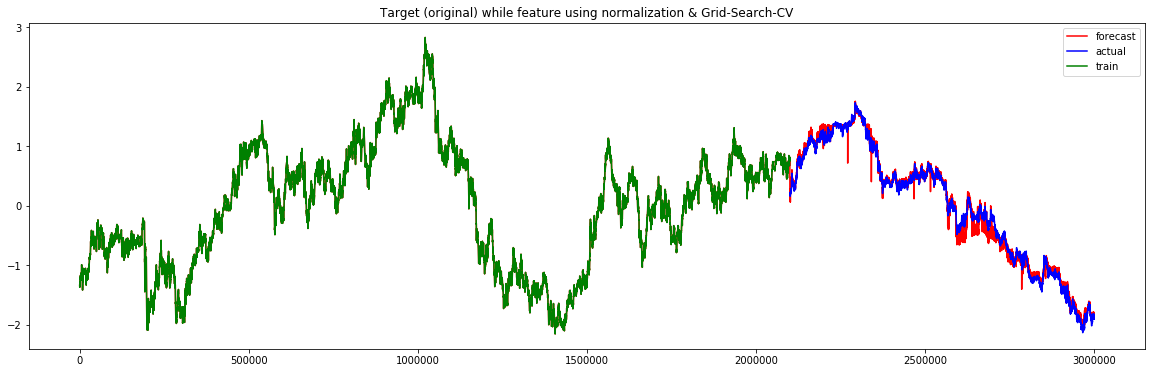

In [43]:
final_pred = clf.predict(x_test_norm)
visual_whole_data(y_train_norm, y_test_norm, final_pred, 
                  'Target (original) while feature using normalization & Grid-Search-CV')

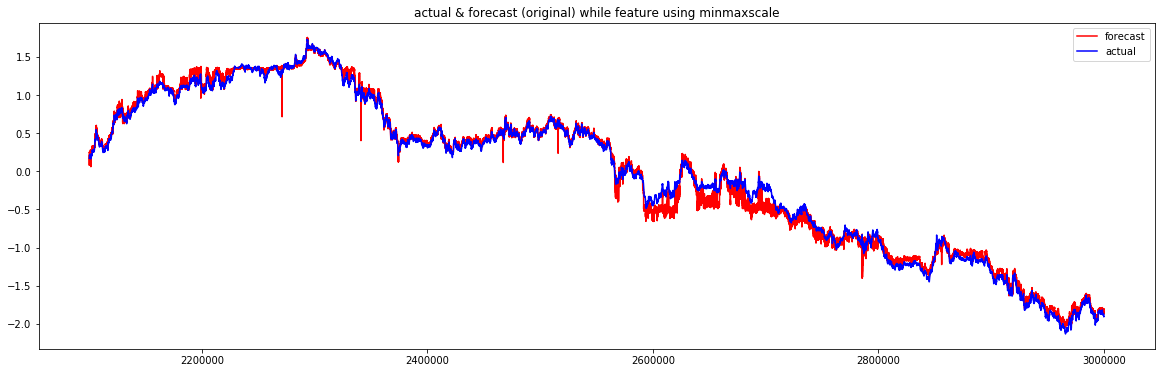

Wall time: 2min 9s


{'me': 0.005628683752682491,
 'mae': 0.057819184592756784,
 'rmse': 0.07995625589906931,
 'acf1': 0.9961757660435644,
 'corr': 0.9968369704569477}

In [44]:
visual_test_pred_only(y_train_norm, final_pred, y_test_norm, 
                      'actual & forecast (original) while feature using minmaxscale')

%time forecast_accuracy_2(final_pred, y_test_norm)